In [1]:
import shap
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import eli5
shap.initjs()

?shap.TreeExplainer

In [2]:
# Read cervical cancer data
cerv = pd.read_csv("../../data/cervical.csv")
y = cerv["Biopsy"].values == "Cancer"
X = cerv.drop(["Biopsy"], axis=1)

mod = sk.ensemble.RandomForestClassifier(n_estimators = 100, random_state = 42)
mod.fit(X,y)

explainer = shap.TreeExplainer(mod, X, model_output = "margin", feature_pertubation = "interventional")
shap_values = explainer.shap_values(X)

model_output = "margin" has been renamed to model_output = "raw"
100%|===================| 1711/1716 [01:57<00:00]        

## Explain Individual Predictions

In [3]:
x = mod.predict_proba(X)[:,1]

In [4]:
np.mean(x)

0.06605891330891331

In [5]:
explainer.expected_value[1]

0.06605891330891339

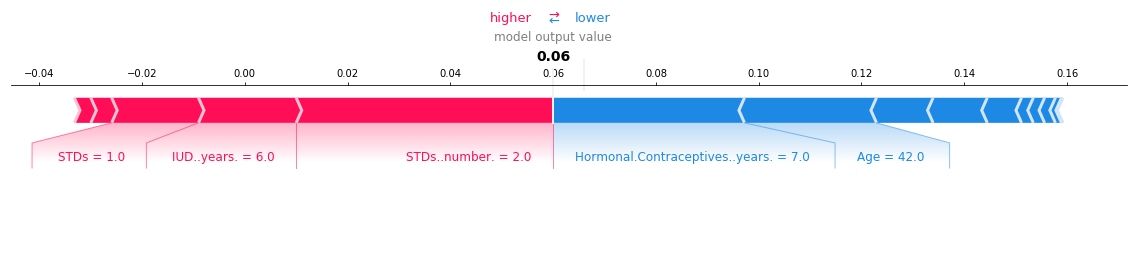

In [6]:
i = 18

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True)

In [7]:
shap_values[1][i,:]

array([-0.02568428, -0.00666634, -0.01054187,  0.00319583, -0.00229275,
       -0.00219411, -0.01101217, -0.0372352 ,  0.00405379,  0.01901467,
        0.01688768,  0.04999967, -0.00211221, -0.00029905, -0.00117259])

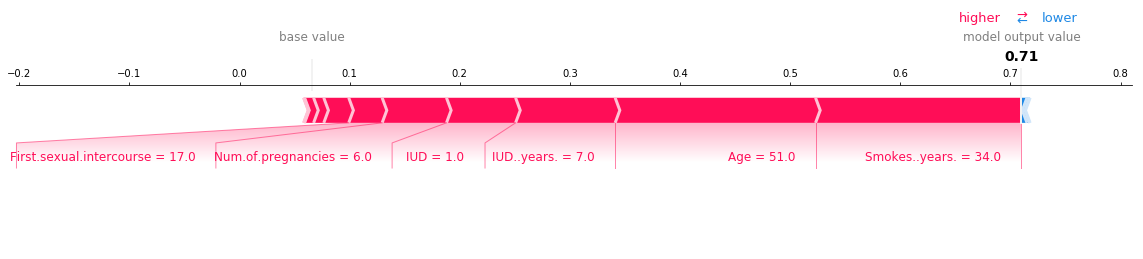

In [8]:
i = 6

# Explain individual predictions
shap.force_plot(explainer.expected_value[1], shap_values[1][i,:], X.iloc[i,:], matplotlib = True, text_rotation = 0)

## Dependence Plots

In [9]:
cmap = plt.get_cmap("viridis", 40)
newcolors = [cmap(0.),  cmap(0.8), cmap(0.8)]
cmap2 = ListedColormap(newcolors)

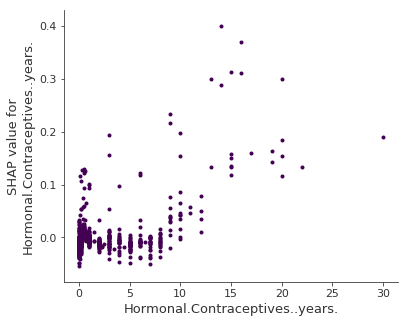

In [10]:
# Feature Effect
shap.dependence_plot("Hormonal.Contraceptives..years.", shap_values[1], X, interaction_index=None, color = cmap2.colors[0])

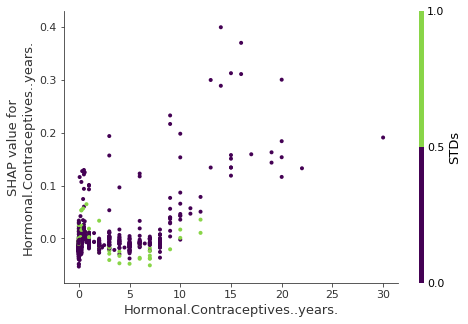

In [11]:
# Feature Effect with auto interaction detection
shap.dependence_plot("Hormonal.Contraceptives..years.", shap_values[1], X, cmap=cmap2)

## Summary Plots / Clustering

In [12]:
# Plot instance clustering
shap.force_plot(explainer.expected_value[1], shap_values[1], X)

# Feature Importance

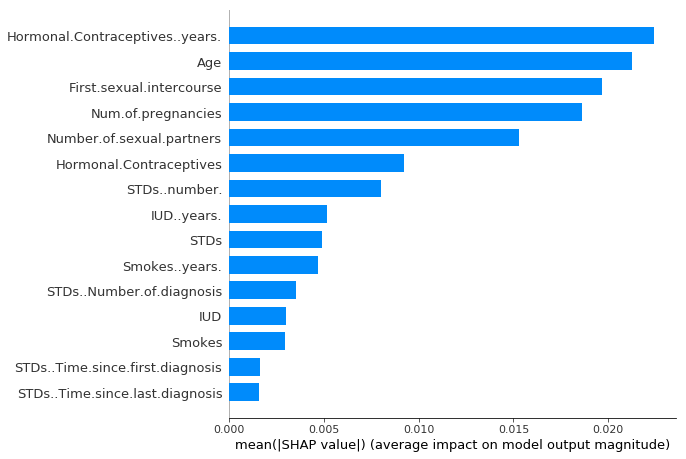

In [13]:
# Plot feature importance
shap.summary_plot(shap_values[1], X, plot_type = "bar")

Compare with permutation feature importance

In [14]:
perm = PermutationImportance(mod).fit(X, y)
eli5.explain_weights(perm)

NameError: name 'PermutationImportance' is not defined

In [ ]:
shap.summary_plot(shap_values[1], X)

In [ ]:
?shap.summary_plot

# More interactions

In [ ]:
shap_ia = explainer.shap_interaction_values(X, y)